# Read Dataset

In [4]:
import pandas as pd

socar_df = pd.read_csv('insurance_fraud_detect_data.csv')

socar = socar_df.copy()

pd.set_option('display.max_columns', len(socar.columns))
socar.tail()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
15995,0,2,0,2,0,2,0,100,2,0,0,1,1,1,0.0000,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,0,5,2,6,618439.4418,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,0,1,3,5,0.0000,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,0,6,1,2,0.0000,0,4,1,0,1,0,0,0,-1,0
15999,0,2,0,2,0,1,0,100,1,0,0,6,5,6,391560.2156,1188750,2,0,0,1,0,0,0,-1,0


# Split dataset

In [6]:
from sklearn.model_selection import train_test_split

# test set is for evaluating our models.
socar_tr = socar[socar.test_set == 0].drop(['test_set'], axis=1)
socar_test = socar[socar.test_set == 1].drop(['test_set'], axis=1)

X_train = socar_tr.drop('fraud_YN', axis=1)
X_test = socar_test.drop('fraud_YN', axis=1)
y_train = socar_tr.fraud_YN
y_test = socar_test.fraud_YN

In [7]:
X_train.shape, X_test.shape

((12879, 23), (3121, 23))

In [8]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([12845,    34], dtype=int64))

In [9]:
tmp_tr = np.unique(y_train, return_counts=True)[1]
tmp_test = np.unique(y_test, return_counts=True)[1]

print("ratio of y_train per x_train :", tmp_tr[1]/len(y_train) * 100)
print("ratio of y_test per x_test :", tmp_test[1]/len(y_test) * 100)

ratio of y_train per x_train : 0.26399565183632273
ratio of y_test per x_test : 0.2242870874719641


# Evaluation

In [10]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc


In [11]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('===========')
    
    print('Accuracy : {0:.4f}, Precision:{1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1:{1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))
    

In [12]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(random_state=13)
lg_clf.fit(X_train, y_train)
lg_pred = lg_clf.predict(X_test)

print_clf_eval(y_test, lg_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy : 0.9978, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy : 0.9978, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy : 0.9978, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy : 0.9978, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [16]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(random_state=13)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

print_clf_eval(y_test, svm_pred)

=> confusion matrix
[[3114    0]
 [   7    0]]
Accuracy : 0.9978, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [17]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model in models:

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        tmp.append(get_clf_eval(y_test, pred))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)


In [18]:
models = [lg_clf, dt_clf, rf_clf, lgbm_clf, svm_clf]
model_names = ['LogisticRegression','DecisionTree', 'RandomForest','LightGBM','LinearSVC']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  2.2186367511749268


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.997757,0.0,0.0,0.0,0.5
DecisionTree,0.997757,0.0,0.0,0.0,0.5
RandomForest,0.997757,0.0,0.0,0.0,0.5
LightGBM,0.997757,0.0,0.0,0.0,0.5
LinearSVC,0.997757,0.0,0.0,0.0,0.5


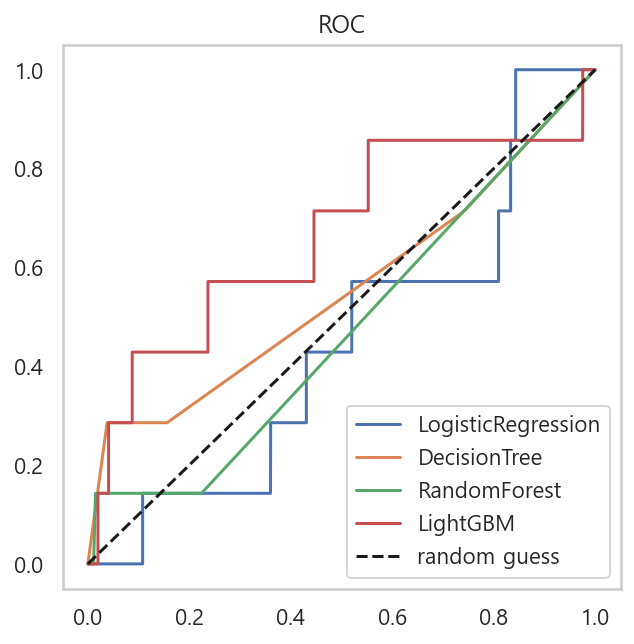

In [20]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_valid, y_valid):
    plt.figure(figsize=(5, 5))
    
    for model in range(len(models)-1):
        pred = models[model].predict_proba(X_valid)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_valid, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0, 1], [0, 1], "k--", label="random guess")
    plt.title("ROC")
    plt.legend()
    plt.grid()
    plt.show()
    
draw_roc_curve(models, model_names, X_test, y_test)

# 2nd test

# Preprocessing

In [27]:
socar_pp = socar.copy()

repair_cost_mean = socar_pp[(socar_pp['repair_cost'] < 3000000) & (socar_pp['repair_cost'] > 100000)]['repair_cost'].mean()
insure_cost_mean = socar_pp[(socar_pp['insure_cost'] < 3000000) & (socar_pp['insure_cost'] > 100000)]['insure_cost'].mean()

socar_pp['repair_cost'][(socar_pp['repair_cost'] >= 3000000)] = repair_cost_mean
socar_pp['repair_cost'][(socar_pp['repair_cost'] <= 100000)] = repair_cost_mean

socar_pp['insure_cost'][(socar_pp['insure_cost'] >= 3000000)] = insure_cost_mean
socar_pp['insure_cost'][(socar_pp['insure_cost'] <= 100000)] = insure_cost_mean

# Test Train Split

In [28]:
socar_tr = socar_pp[socar_pp.test_set == 0].drop(['test_set'], axis=1)
socar_test = socar_pp[socar_pp.test_set == 1].drop(['test_set'], axis=1)

X_train = socar_tr.drop('fraud_YN', axis=1)
X_test = socar_test.drop('fraud_YN', axis=1)
y_train = socar_tr.fraud_YN
y_test = socar_test.fraud_YN

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost', 'repair_cnt']

scaler = StandardScaler()
scaler.fit(X_train[num_attribs])

X_train[num_attribs] = scaler.transform(X_train[num_attribs])
X_test[num_attribs] = scaler.transform(X_test[num_attribs])

# OneHotEncoding

In [30]:
cat_attribs = [attrib for attrib in socar_pp.columns if attrib not in ['fraud_YN', 'accident_ratio', 'repair_cost', 'insure_cost', 'repair_cnt', 'test_set']]
                
X_train = pd.get_dummies(X_train, columns=cat_attribs)
X_test = pd.get_dummies(X_test, columns=cat_attribs)

# Over Sampling

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [33]:
X_train.shape, y_train.shape, X_train_over.shape, y_train_over.shape

((12879, 75), (12879,), (25690, 75), (25690,))

In [34]:
np.unique(y_train, return_counts=True), np.unique(y_train_over, return_counts=True)

((array([0, 1], dtype=int64), array([12845,    34], dtype=int64)),
 (array([0, 1], dtype=int64), array([12845, 12845], dtype=int64)))

In [36]:
models = [lg_clf, dt_clf, rf_clf, lgbm_clf, svm_clf]
model_names = ['LogisticRegression','DecisionTree', 'RandomForest','LightGBM','LinearSVC']

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  2.956663131713867


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.997757,0.000000,0.000000,0.000000,0.500000
DecisionTree,0.701698,0.003226,0.428571,0.006403,0.565442
RandomForest,0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.997437,0.000000,0.000000,0.000000,0.499839
LinearSVC,0.997757,0.000000,0.000000,0.000000,0.500000


# Function

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


def get_pca_data(data, random_state, n_components=2):
    pca = PCA(n_components=n_components, random_state=random_state)
    pca.fit(data)
    
    return pca.transform(data), pca

def get_result_pd(models, model_names, X_train, y_train, X_val, y_val, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model, param in models:
        # Modeling
        grid = GridSearchCV(model, param, cv=5, scoring = 'recall')
        grid.fit(X_train, y_train)

        pred = grid.predict(X_val)
        tmp.append(get_clf_eval(y_val, pred))
        # predict test dataset
        pred_test = grid.predict(X_test)
        tmp.append(get_clf_eval(y_test, pred_test))
        
    df = pd.DataFrame(tmp, columns=col_names, index=model_names)
    df = df.style.applymap(color)
        
    return df

def color(val):
    color = 'orange' if val > 0.6 else 'black'
    return 'color: %s' % color

def get_outlier(df=None, column=None, weight=1.5):
    fraud= df[df["fraud_YN"]==0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_25 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 = quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler)
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC


def model_scores(data, scaler, drop_cols=[], sampling=None, onehotencoding=False, n_components=2, random_state=13, num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost', 'repair_cnt']):
    
    # onehotencoding
    if onehotencoding:
        cat_attribs = data.columns.drop(['fraud_YN', 'test_set'] + num_attribs)
        data = pd.get_dummies(data, columns=cat_attribs)       
        
    # drop columns
    if drop_cols:
        data = data.drop(drop_cols, axis=1) 
            
    # split dataset
    train_data = data[data.test_set == 0].drop(['test_set'], axis=1)
    test_data = data[data.test_set == 1].drop(['test_set'], axis=1)
      
    X = train_data.drop('fraud_YN', axis=1)
    y = train_data.fraud_YN
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    
    X_test = test_data.drop('fraud_YN', axis=1)
    y_test = test_data.fraud_YN    
    
    # scaling
    if num_attribs:
        num_attribs = [attrib for attrib in num_attribs if attrib not in drop_cols]
        scaler_obj = scaler
        scaler_obj.fit(X_train[num_attribs])

        for dataset in [X_train, X_val, X_test]:
            dataset[num_attribs] = scaler_obj.transform(dataset[num_attribs])
        
    # sampling
    if sampling:
        spl = sampling(random_state=random_state)
        X_train, y_train = spl.fit_sample(X_train, y_train)    
    
    # PCA
    if n_components:
        X_train, pca = get_pca_data(X_train, n_components=n_components, random_state=random_state)
        X_val, pca = get_pca_data(X_val, n_components=n_components, random_state=random_state)
        X_test, pca = get_pca_data(X_test, n_components=n_components, random_state=random_state)
        
    # classifier
    lg_clf = LogisticRegression(random_state=random_state)
    dt_clf = DecisionTreeClassifier(random_state=random_state, max_depth=2)
    rf_clf = RandomForestClassifier(random_state=random_state, n_jobs=-1, n_estimators=100)
    lgbm_clf = LGBMClassifier(random_state=random_state, n_estimators=200, num_leaves=16, n_jobs=-1, boost_from_average=False)
    svm_clf = LinearSVC(random_state=random_state)
    
    # hyper-parameters
    lg_params=[{'C':[0.1, 0.5, 1]}]
    dt_params= [{'max_depth': [2, 4, 8, 16]}]
    rf_params = [{'n_estimators': [50, 100, 200, 400]}]
    lgbm_params = [{'n_estimators': [50, 100, 200, 400], 'num_leaves': [4, 8, 16, 32]}]
    svm_params = [{'C':[0.1, 0.5, 1]}]
    
    models = [(lg_clf,lg_params), (dt_clf,dt_params), (rf_clf,rf_params), (lgbm_clf,lgbm_params), (svm_clf,svm_params)]
    model_names = ['LogisticRegression','LogisticRegression(test)','DecisionTree','DecisionTree(test)',
                   'RandomForest','RandomForest(test)','LightGBM','LightGBM(test)', 'SVM', 'SVM(test)']
    
    start_time = time.time()
    results = get_result_pd(models, model_names, X_train, y_train, X_val, y_val, X_test, y_test)
    
    return results

# 1st Trial
- MinMaxScaler & OneHotEncoding
- PCA(n=2)
- RandomOverSampler

In [70]:
model_scores(socar, MinMaxScaler(), onehotencoding=True, n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.546584,0.005115,0.857143,0.010169,0.701440
LogisticRegression(test),0.501442,0.001929,0.428571,0.003841,0.465089
DecisionTree,0.992624,0.000000,0.000000,0.000000,0.497664
DecisionTree(test),0.994873,0.000000,0.000000,0.000000,0.498555
RandomForest,0.995730,0.000000,0.000000,0.000000,0.499221
RandomForest(test),0.996796,0.000000,0.000000,0.000000,0.499518
LightGBM,0.823758,0.004435,0.285714,0.008734,0.555469
LightGBM(test),0.960910,0.000000,0.000000,0.000000,0.481535
SVM,0.557842,0.004378,0.714286,0.008703,0.635851
SVM(test),0.506568,0.001949,0.428571,0.003881,0.467658


# 2nd Trial
- StandardScaler & OneHotEncoding
- PCA
- RandomOverSampler

In [74]:
model_scores(socar, StandardScaler(), onehotencoding=True, n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.435559,0.001378,0.285714,0.002743,0.360841
LogisticRegression(test),0.604293,0.001623,0.285714,0.003228,0.445362
DecisionTree,0.996506,0.000000,0.000000,0.000000,0.499611
DecisionTree(test),0.997116,0.000000,0.000000,0.000000,0.499679
RandomForest,0.997283,0.000000,0.000000,0.000000,0.500000
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.980202,0.000000,0.000000,0.000000,0.491436
LightGBM(test),0.994233,0.000000,0.000000,0.000000,0.498234
SVM,0.431677,0.001369,0.285714,0.002725,0.358895
SVM(test),0.618071,0.000842,0.142857,0.001675,0.380998


# 3rd Trial
- RobustScaler & OneHotEncoding
- PCA
- RandomOverSampler

In [75]:
model_scores(socar, RobustScaler(), onehotencoding=True, n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.139363,0.002700,0.857143,0.005384,0.497275
LogisticRegression(test),0.139699,0.002230,0.857143,0.004449,0.497614
DecisionTree,0.997283,0.000000,0.000000,0.000000,0.500000
DecisionTree(test),0.997757,0.000000,0.000000,0.000000,0.500000
RandomForest,0.987966,0.000000,0.000000,0.000000,0.495329
RandomForest(test),0.996796,0.000000,0.000000,0.000000,0.499518
LightGBM,0.139363,0.002700,0.857143,0.005384,0.497275
LightGBM(test),0.139699,0.002230,0.857143,0.004449,0.497614
SVM,0.139363,0.002700,0.857143,0.005384,0.497275
SVM(test),0.139699,0.002230,0.857143,0.004449,0.497614


In [76]:
model_scores(socar, RobustScaler(), onehotencoding=True, n_components=2, sampling=SMOTE)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.139363,0.002700,0.857143,0.005384,0.497275
LogisticRegression(test),0.139699,0.002230,0.857143,0.004449,0.497614
DecisionTree,0.620730,0.004090,0.571429,0.008122,0.596146
DecisionTree(test),0.212752,0.002437,0.857143,0.004860,0.534223
RandomForest,0.996894,0.000000,0.000000,0.000000,0.499805
RandomForest(test),0.991669,0.000000,0.000000,0.000000,0.496949
LightGBM,0.809394,0.002058,0.142857,0.004057,0.477034
LightGBM(test),0.900993,0.000000,0.000000,0.000000,0.451509
SVM,0.139363,0.002700,0.857143,0.005384,0.497275
SVM(test),0.139699,0.002230,0.857143,0.004449,0.497614


# 4th Trial
- Preprocessing null to median
- StandardScaler & OneHotEncoding
- PCA
- RandomOverSampler or SMOTE

In [77]:
socar_4 = socar.copy()

In [78]:
repair_cost_median = socar_4[(socar_4['repair_cost'] != 0)]['repair_cost'].median()
socar_4['repair_cost'][(socar_4['repair_cost'] == 0)] = repair_cost_median

insure_cost_median = socar_4[(socar_4['insure_cost'] != 0)]['insure_cost'].median()
socar_4['insure_cost'][(socar_4['insure_cost'] == 0)] = insure_cost_median

In [80]:
model_scores(socar_4, StandardScaler(), onehotencoding=True, n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.696817,0.005115,0.571429,0.010139,0.634293
LogisticRegression(test),0.558795,0.002180,0.428571,0.004338,0.493830
DecisionTree,0.685171,0.006143,0.714286,0.012180,0.699689
DecisionTree(test),0.583146,0.002308,0.428571,0.004591,0.506033
RandomForest,0.997283,0.000000,0.000000,0.000000,0.500000
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.954193,0.017391,0.285714,0.032787,0.620864
LightGBM(test),0.990708,0.041667,0.142857,0.064516,0.567736
SVM,0.703416,0.005229,0.571429,0.010363,0.637602
SVM(test),0.567446,0.002224,0.428571,0.004425,0.498165


In [81]:
model_scores(socar_4, StandardScaler(), n_components=2, sampling=SMOTE)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.510870,0.004743,0.857143,0.009434,0.683534
LogisticRegression(test),0.469080,0.002413,0.571429,0.004805,0.520139
DecisionTree,0.877329,0.000000,0.000000,0.000000,0.439860
DecisionTree(test),0.895226,0.003106,0.142857,0.006079,0.519887
RandomForest,0.933618,0.000000,0.000000,0.000000,0.468081
RandomForest(test),0.951938,0.000000,0.000000,0.000000,0.477039
LightGBM,0.909161,0.000000,0.000000,0.000000,0.455819
LightGBM(test),0.927267,0.004505,0.142857,0.008734,0.535944
SVM,0.510093,0.004736,0.857143,0.009419,0.683145
SVM(test),0.467799,0.002407,0.571429,0.004793,0.519497


# 5th Trial
- Drop insure_cost & repair_cost
- StandardScaler & OneHotEncoding
- PCA
- RandomUnderSampler

In [85]:
model_scores(socar, StandardScaler(), drop_cols=['repair_cost','insure_cost'], onehotencoding=True, n_components=2, sampling=RandomUnderSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.758152,0.006410,0.571429,0.012678,0.665045
LogisticRegression(test),0.536046,0.002073,0.428571,0.004127,0.482430
DecisionTree,0.513975,0.004773,0.857143,0.009494,0.685091
DecisionTree(test),0.590195,0.001567,0.285714,0.003118,0.438297
RandomForest,0.344332,0.003542,0.857143,0.007055,0.600039
RandomForest(test),0.117270,0.002174,0.857143,0.004337,0.486375
LightGBM,0.653339,0.005580,0.714286,0.011074,0.683729
LightGBM(test),0.517142,0.001992,0.428571,0.003966,0.472956
SVM,0.758152,0.006410,0.571429,0.012678,0.665045
SVM(test),0.548863,0.002132,0.428571,0.004243,0.488852


# 6th Trial
- Drop police_site_aid_YN & acc_type1
- StandardScaler & OneHotEncoding
- PCA
- RandomUnderSampler

In [93]:
columns = ['police_site_aid_YN_0', 'police_site_aid_YN_1', 'acc_type1_0', 'acc_type1_1', 'acc_type1_2', 'acc_type1_3']
model_scores(socar, StandardScaler(), drop_cols=columns, onehotencoding=True, n_components=2, sampling=RandomUnderSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.663043,0.003460,0.428571,0.006865,0.546127
LogisticRegression(test),0.569689,0.004451,0.857143,0.008856,0.713093
DecisionTree,0.596661,0.002890,0.428571,0.005742,0.512845
DecisionTree(test),0.651073,0.001842,0.285714,0.003660,0.468804
RandomForest,0.717391,0.002759,0.285714,0.005464,0.502141
RandomForest(test),0.732458,0.002404,0.285714,0.004768,0.509588
LightGBM,0.663043,0.006873,0.857143,0.013636,0.759829
LightGBM(test),0.838834,0.002008,0.142857,0.003960,0.491628
SVM,0.725932,0.004255,0.428571,0.008427,0.577657
SVM(test),0.626722,0.002577,0.428571,0.005124,0.527870


# 7th Trial
- Drop police_site_aid_YN & acc_type1
- StandardScaler & OneHotEncoding
- PCA(n_components=4)
- SMOTETomek

In [94]:
columns = ['police_site_aid_YN_0', 'police_site_aid_YN_1', 'acc_type1_0', 'acc_type1_1', 'acc_type1_2', 'acc_type1_3']
model_scores(socar, StandardScaler(), drop_cols=columns, onehotencoding=True, n_components=4, sampling=SMOTETomek)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.628494,0.001050,0.142857,0.002086,0.386337
LogisticRegression(test),0.580583,0.001531,0.285714,0.003046,0.433480
DecisionTree,0.914984,0.004673,0.142857,0.009050,0.529973
DecisionTree(test),0.910926,0.000000,0.000000,0.000000,0.456487
RandomForest,0.958851,0.009901,0.142857,0.018519,0.551966
RandomForest(test),0.921500,0.000000,0.000000,0.000000,0.461785
LightGBM,0.911102,0.004464,0.142857,0.008658,0.528026
LightGBM(test),0.861903,0.000000,0.000000,0.000000,0.431920
SVM,0.622671,0.001034,0.142857,0.002053,0.383418
SVM(test),0.575457,0.001513,0.285714,0.003010,0.430911


# 8th Trial
- Random Under Sampling
- Drop 5 columns
- StandardScaler & OneHotEncoding
- PCA(n_components=2)
- SMOTEENN

In [97]:
columns = ['repair_cost', 'insure_cost', 'police_site_aid_YN_0', 'police_site_aid_YN_1', 'acc_type1_0', 'acc_type1_1', 'acc_type1_2', 'acc_type1_3']
model_scores(socar, StandardScaler(), drop_cols=columns, onehotencoding=True, n_components=2, sampling=SMOTEENN)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.397516,0.003215,0.714286,0.006402,0.555469
LogisticRegression(test),0.514579,0.002639,0.571429,0.005253,0.542940
DecisionTree,0.733696,0.004380,0.428571,0.008671,0.581549
DecisionTree(test),0.834668,0.001957,0.142857,0.003861,0.489540
RandomForest,0.792314,0.005618,0.428571,0.011091,0.610938
RandomForest(test),0.826338,0.000000,0.000000,0.000000,0.414098
LightGBM,0.769410,0.003384,0.285714,0.006689,0.528221
LightGBM(test),0.835309,0.000000,0.000000,0.000000,0.418593
SVM,0.397516,0.003215,0.714286,0.006402,0.555469
SVM(test),0.514899,0.002640,0.571429,0.005256,0.543100


# 9th Trial
- Preprocessing categorical features
- Drop 4 columns
- StandardScaler & OneHotEncoding
- PCA(n_components=2)
- RandomUnderSampler

In [122]:
socar_9 = socar.copy()

In [123]:
socar_9['acc_type1'][socar_9['acc_type1'] <= 1] = 0
socar_9['acc_type1'][socar_9['acc_type1'] > 1] = 1

socar_9['b2b'][socar_9['b2b'] == 2] = 1

socar_9['accident_ratio'][socar_9['accident_ratio'] >= 50] = 1
socar_9['accident_ratio'][socar_9['accident_ratio'] < 50] = 0

socar_9['repair_cnt'][socar_9['repair_cnt'] <= 2] = 0
socar_9['repair_cnt'][socar_9['repair_cnt'] > 2] = 1

In [124]:
columns = ['repair_cost', 'insure_cost', 'police_site_aid_YN_0', 'police_site_aid_YN_1', 'insurance_site_aid_YN_0', 'insurance_site_aid_YN_1', 'insurance_site_aid_YN_2']

In [129]:
model_scores(socar_9, StandardScaler(), drop_cols=columns, onehotencoding=True, n_components=2, sampling=RandomOverSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.464286,0.002896,0.571429,0.005764,0.517711
LogisticRegression(test),0.438962,0.002283,0.571429,0.004548,0.505046
DecisionTree,0.991848,0.000000,0.000000,0.000000,0.497275
DecisionTree(test),0.967318,0.000000,0.000000,0.000000,0.484746
RandomForest,0.997283,0.000000,0.000000,0.000000,0.500000
RandomForest(test),0.996475,0.000000,0.000000,0.000000,0.499358
LightGBM,0.939441,0.000000,0.000000,0.000000,0.471000
LightGBM(test),0.927267,0.000000,0.000000,0.000000,0.464676
SVM,0.465839,0.002905,0.571429,0.005780,0.518490
SVM(test),0.438321,0.002281,0.571429,0.004543,0.504725
